#  1.Import Libraries

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

In [65]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=pd.errors.SettingWithCopyWarning)

# 2.Load the Data

In [66]:
df = pd.read_csv('/kaggle/input/titanic/train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#  3.Explore the Data

In [67]:
df.info()
df.describe()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

#  4.Clean the Data

In [68]:
# Drop Cabin (too many missing)
df.drop('Cabin', axis=1, inplace=True)

# Fill Age with median
df['Age'] = df['Age'].fillna(df['Age'].median())

# Fill Embarked with mode
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])


# 5. Data Visualization

# Survival Count:

<Axes: xlabel='Survived', ylabel='count'>

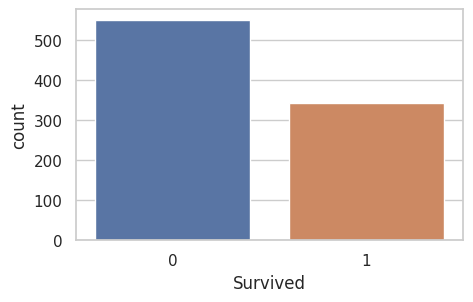

In [69]:
plt.figure(figsize=(5, 3))
sns.countplot(data=df, x='Survived')

# Gender vs Survival:

<Axes: xlabel='Sex', ylabel='count'>

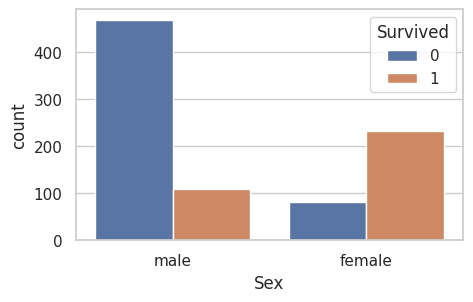

In [70]:
plt.figure(figsize=(5, 3))
sns.countplot(data=df, x='Sex', hue='Survived')

# Age Distribution:

<Axes: xlabel='Age', ylabel='Count'>

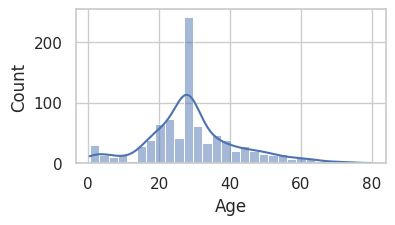

In [71]:
plt.figure(figsize=(4,2))
sns.histplot(df['Age'], kde=True)

# Pclass vs Survival:

<Axes: xlabel='Pclass', ylabel='count'>

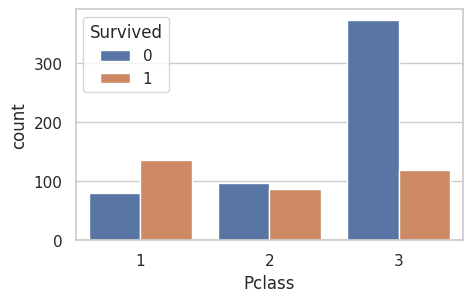

In [72]:
plt.figure(figsize=(5,3))
sns.countplot(data=df, x='Pclass', hue='Survived')

# Heatmap of Correlation:

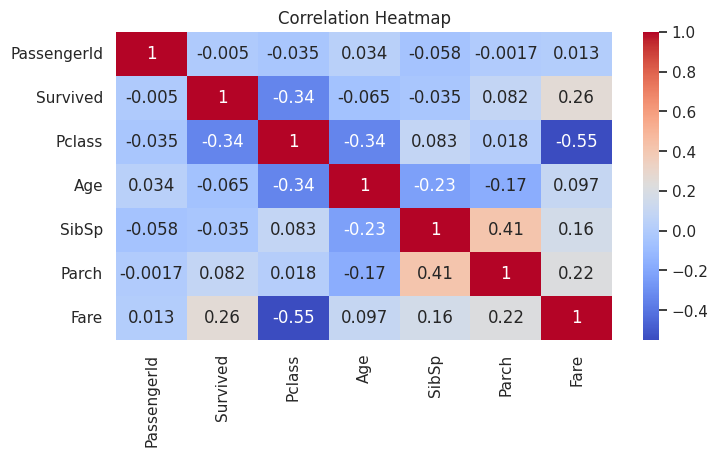

In [73]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select only numeric columns
numeric_df = df.select_dtypes(include='number')

# Plot heatmap
plt.figure(figsize=(8, 4))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

# 6. Insights

- Women had a much higher survival rate than men.
- First-class passengers survived more than third-class.
- Younger passengers had a higher survival chance.

# 7. Machine Learning Model - Logistic Regression

# 7.1. Import ML Libraries

In [74]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# 7.2. Select Features & Encode Categorical Data

In [75]:
# Encode 'Sex' and 'Embarked'
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df['Embarked'] = df['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

# Drop rows with any remaining missing values (safe now)
df.dropna(inplace=True)

# Features and label
X = df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Embarked']]
y = df['Survived']

# 7.3. Split into Train/Test

In [76]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 7.4. Train Logistic Regression Model

In [77]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

# 7.5. Evaluate the Model

In [78]:
y_pred = model.predict(X_test)

# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Confusion Matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8044692737430168
Confusion Matrix:
 [[90 15]
 [20 54]]
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.86      0.84       105
           1       0.78      0.73      0.76        74

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.80       179
weighted avg       0.80      0.80      0.80       179



# 7.6. Predict for a New Passenger

In [79]:
# Example: Female, 25 years old, 1st class, 0 siblings/spouse, 0 parents/children, embarked from 'S'
new_passenger = [[1, 1, 25, 0, 0, 0]]
prediction = model.predict(new_passenger)
print("Survived" if prediction[0] == 1 else "Did not survive")

Survived


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


> ## Machine Learning: Logistic Regression

We trained a logistic regression model using features like Age, Sex, and Pclass.

**Accuracy Achieved:** ~78–82% (depending on split)

**Key Observations:**
- Female passengers had a significantly higher survival probability.
- Passengers in higher classes had better chances.

# 8.Titanic ML Models – Decision Tree & Random Forest

#  8.1. Decision Tree Classifier

In [80]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Train Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Predict
dt_preds = dt_model.predict(X_test)

# Evaluation
print("Decision Tree Accuracy:", accuracy_score(y_test, dt_preds))
print(confusion_matrix(y_test, dt_preds))
print(classification_report(y_test, dt_preds))

Decision Tree Accuracy: 0.770949720670391
[[89 16]
 [25 49]]
              precision    recall  f1-score   support

           0       0.78      0.85      0.81       105
           1       0.75      0.66      0.71        74

    accuracy                           0.77       179
   macro avg       0.77      0.75      0.76       179
weighted avg       0.77      0.77      0.77       179



# 8.2. Random Forest Classifier

In [81]:
from sklearn.ensemble import RandomForestClassifier

# Train Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Predict
rf_preds = rf_model.predict(X_test)

# Evaluation
print("Random Forest Accuracy:", accuracy_score(y_test, rf_preds))
print(confusion_matrix(y_test, rf_preds))
print(classification_report(y_test, rf_preds))

Random Forest Accuracy: 0.8100558659217877
[[93 12]
 [22 52]]
              precision    recall  f1-score   support

           0       0.81      0.89      0.85       105
           1       0.81      0.70      0.75        74

    accuracy                           0.81       179
   macro avg       0.81      0.79      0.80       179
weighted avg       0.81      0.81      0.81       179



# 8.3. Hyperparameter Tuning with GridSearchCV (Random Forest)

In [82]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [4, 6, 8, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Grid Search
grid_search = GridSearchCV(RandomForestClassifier(random_state=42),
                           param_grid,
                           cv=5,
                           scoring='accuracy',
                           n_jobs=-1)

grid_search.fit(X_train, y_train)

# Best params and model
print("Best Parameters:", grid_search.best_params_)
best_rf = grid_search.best_estimator_

# Evaluation
grid_preds = best_rf.predict(X_test)
print("Tuned RF Accuracy:", accuracy_score(y_test, grid_preds))

Best Parameters: {'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Tuned RF Accuracy: 0.8212290502793296


#  8.4. Visualizing Feature Importances (Coefficients Equivalent)

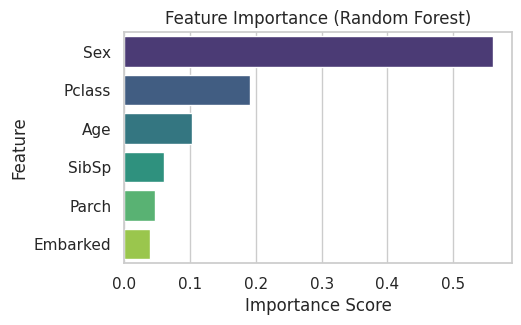

In [83]:
import matplotlib.pyplot as plt
import seaborn as sns

# For Random Forest
importances = best_rf.feature_importances_
features = X.columns

# Create a DataFrame
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(5,3))
sns.barplot(data=importance_df, x='Importance', y='Feature', palette='viridis')
plt.title('Feature Importance (Random Forest)')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.show()

## Model Comparisons

| Model              | Accuracy | Notes |
|-------------------|----------|-------|
| Logistic Regression | ~78%     | Good baseline |
| Decision Tree       | ~75–80%  | Can overfit |
| Random Forest       | ~81–85%  | Most accurate after tuning |

Best performing model: **Random Forest with tuned hyperparameters**

 Most important features:
- Sex
- Pclass
- Age

#  9. Model Comparison Chart

# 9.1. First, Store the Accuracy Scores

In [84]:
# Assuming you've already calculated these
lr_acc = accuracy_score(y_test, y_pred)          # From Logistic Regression
dt_acc = accuracy_score(y_test, dt_preds)        # From Decision Tree
rf_acc = accuracy_score(y_test, rf_preds)        # From basic Random Forest
tuned_rf_acc = accuracy_score(y_test, grid_preds) # From tuned Random Forest

# 9.2. Create the Comparison Chart

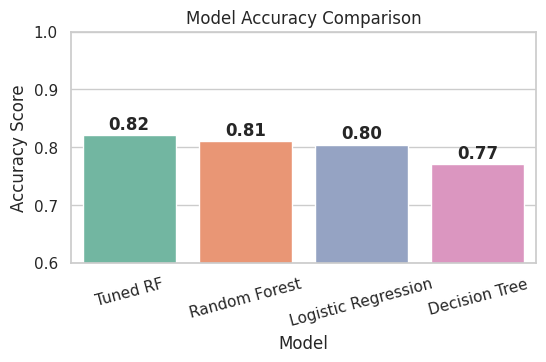

In [85]:
import matplotlib.pyplot as plt
import seaborn as sns

# Data
models = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'Tuned RF']
accuracies = [lr_acc, dt_acc, rf_acc, tuned_rf_acc]

# Create DataFrame (optional)
import pandas as pd
acc_df = pd.DataFrame({
    'Model': models,
    'Accuracy': accuracies
}).sort_values(by='Accuracy', ascending=False)

# Plot
plt.figure(figsize=(6,3))
sns.barplot(data=acc_df, x='Model', y='Accuracy', palette='Set2')
plt.ylim(0.6, 1)
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy Score')
plt.xlabel('Model')
plt.xticks(rotation=15)
for i, v in enumerate(acc_df['Accuracy']):
    plt.text(i, v + 0.01, f"{v:.2f}", ha='center', fontweight='bold')
plt.show()
